<a href="https://colab.research.google.com/github/gyana-ranjan-dash/water-potability/blob/main/water_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

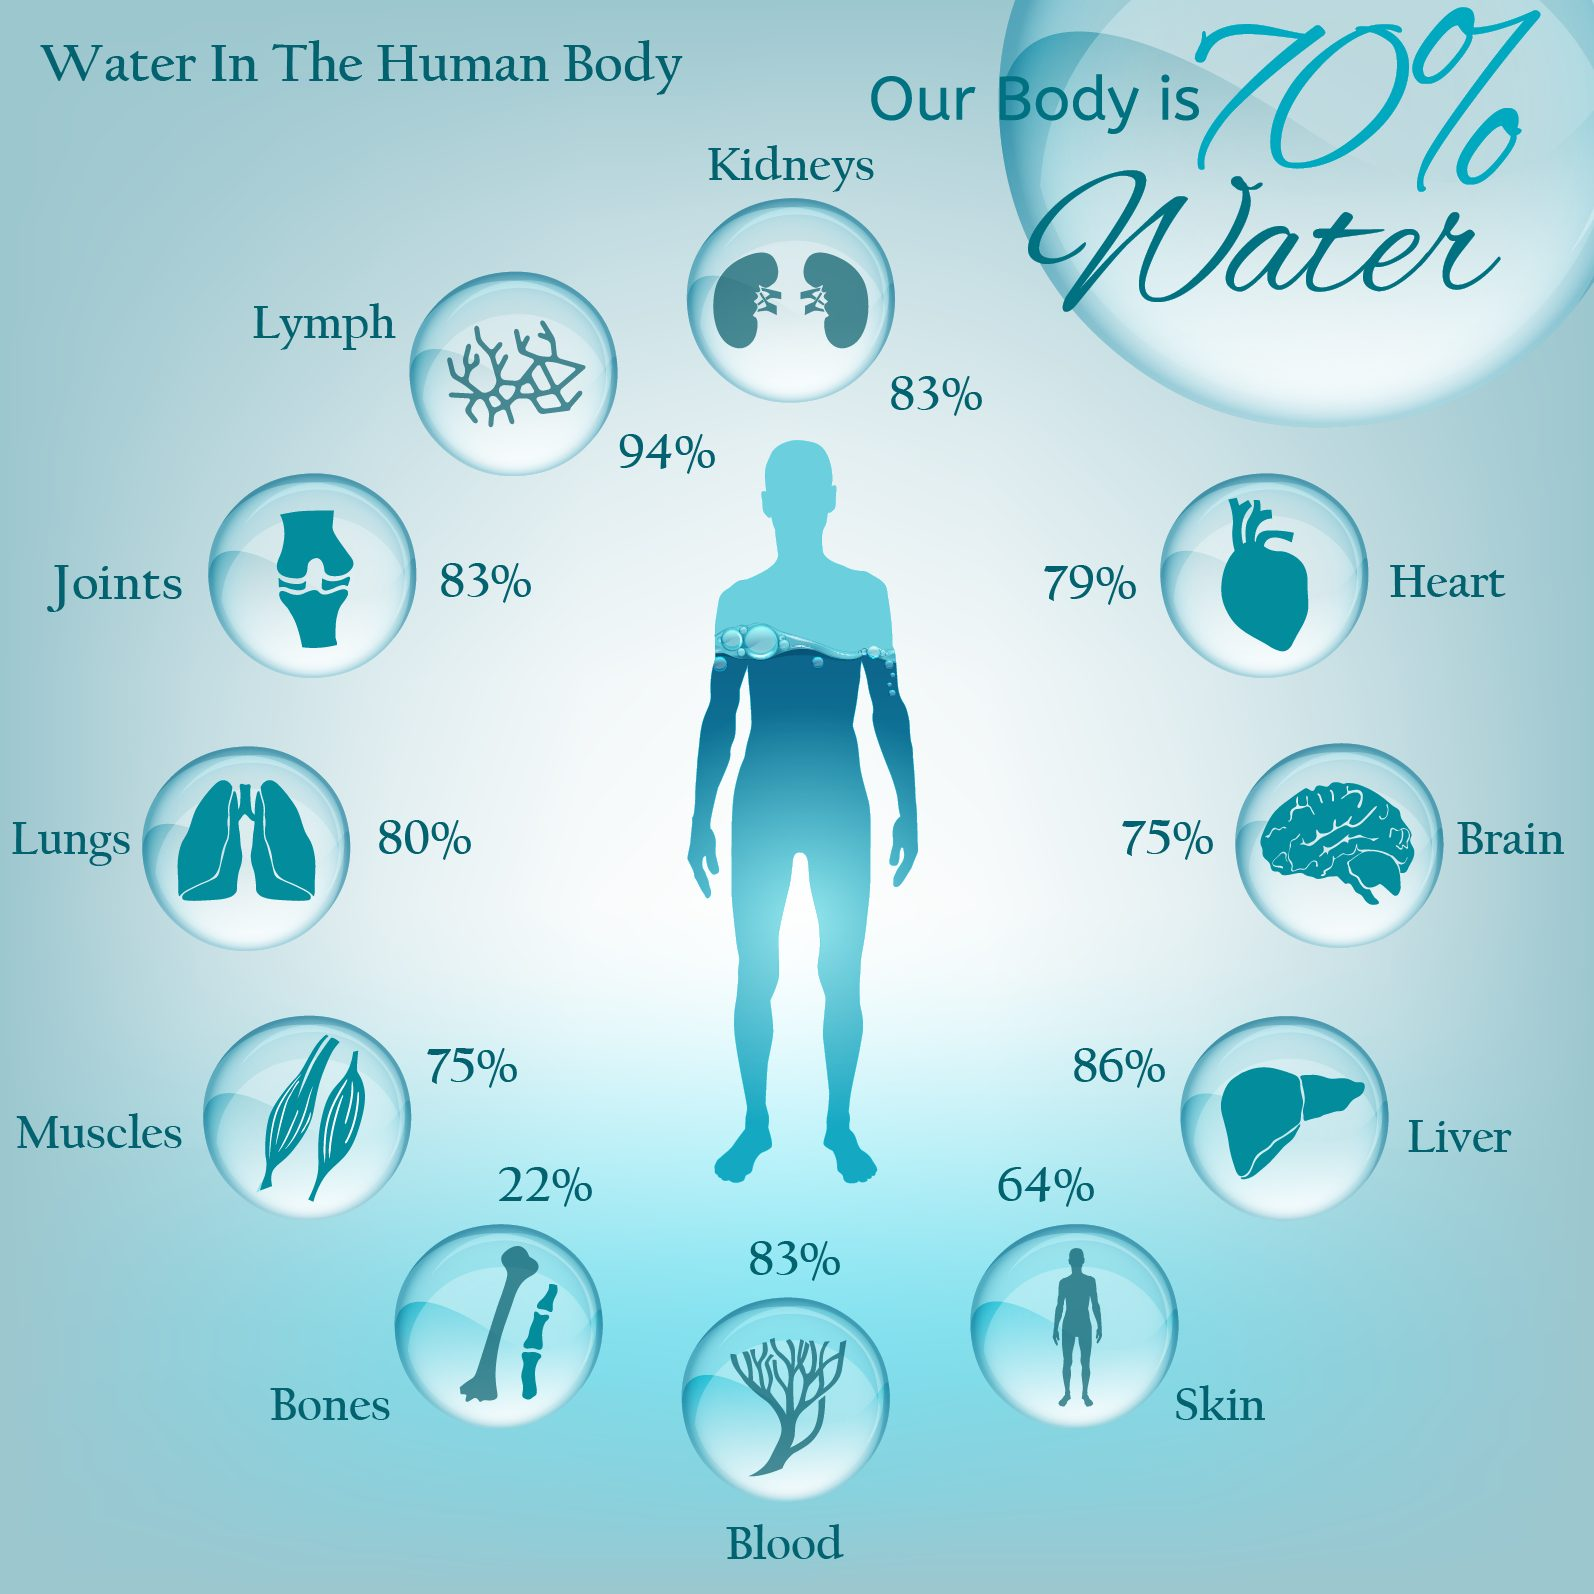

Human body contains 60% to 65% of water. We can't even survive without water for few days. But we have a huge source of water. Water covers majority portion of the Earth.

Though 💧 water is the most abandant resource on the Earth, still only about 2% water can be used for drinking. Now, the 2% also contains suspended solids, sulfates, organic carbon, etc. and if their portions increases more than specified value, this water can't be used for drinking. So the most abandant resource resource on the Earth, which covers 70% of our planet and we can't use it!

The 🎯 aim of this exercise is to find out which parameter influences the potability of water and to differntiate potable and non potable water using a ML model.

In [1]:
!pip install pycaret


     |████████████████████████████████| 264 kB 35.4 MB/s 
     |████████████████████████████████| 248 kB 64.7 MB/s 
     |████████████████████████████████| 14.4 MB 57 kB/s 
     |████████████████████████████████| 167 kB 56.7 MB/s 
     |████████████████████████████████| 2.0 MB 69.4 MB/s 
     |████████████████████████████████| 80 kB 8.5 MB/s 
     |████████████████████████████████| 1.7 MB 35.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 26.9 MB/s 
     |████████████████████████████████| 271 kB 51.4 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 1.3 MB 53.6 MB/s 
     |████████████████████████████████| 105 kB 64.0 MB/s 
     |████████████████████████████████| 3.1 MB 29.7 MB/s 
     |████████████████████████████████| 636 kB 51.7 MB/s 
     |██████████████████

In [2]:
import os               
import numpy                   as np
import pandas                  as pd 
import matplotlib.pyplot       as plt
import seaborn                 as sns
from pycaret.classification import *
from plotnine import*
import datetime as dt
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
import plotly.express          as ex
import plotly.graph_objs       as go
import plotly.offline          as pyo
import scipy.stats             as stats
import pymc3                   as pm
import theano.tensor           as tt
from plotly.subplots           import make_subplots
from sklearn.preprocessing     import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition     import TruncatedSVD,PCA
from sklearn.ensemble          import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree              import DecisionTreeClassifier
from sklearn.linear_model      import LinearRegression,LogisticRegressionCV

from sklearn.svm               import SVC
from sklearn.metrics           import mean_squared_error,r2_score
from sklearn.pipeline          import Pipeline
from sklearn.model_selection   import cross_val_score,train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.manifold          import Isomap,TSNE
from sklearn.feature_selection import mutual_info_classif
from tqdm.notebook             import tqdm
from scipy.stats               import ttest_ind
from sklearn.model_selection import train_test_split
import warnings
%matplotlib inline


In [3]:
#loading dataset in water_df
water_df = pd.read_csv('https://raw.githubusercontent.com/gyana-ranjan-dash/Safer-drinking-water/main/water_potability.csv',encoding = 'unicode_escape',date_parser='Date')

In [4]:
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
water_df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [6]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
water_df.describe(include='all', percentiles=[.25, .50, .75, .95,.99])

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
95%,9.789819,249.609769,38474.990249,9.753101,403.070190,566.349320,19.637254,92.124059,5.220925,1.000000
99%,10.895339,278.062602,45974.106490,10.967153,434.021991,617.626558,22.090049,104.739231,5.741640,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


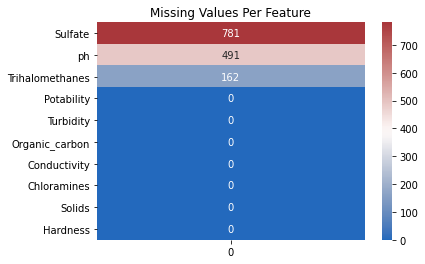

In [8]:
plt.title('Missing Values Per Feature')
nans = water_df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')
plt.show()

In [9]:
water_df.isnull().mean()*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64



*   ``ph`` and ``Trihalomethanes`` have less than 20% missing values, so they can be imputed. 
*  ``Sulfate`` feature, as it has more than 20% missing values, let's do some univariate analysis on it and if we find that it is important, then we will impute it too or else drop the whole column.



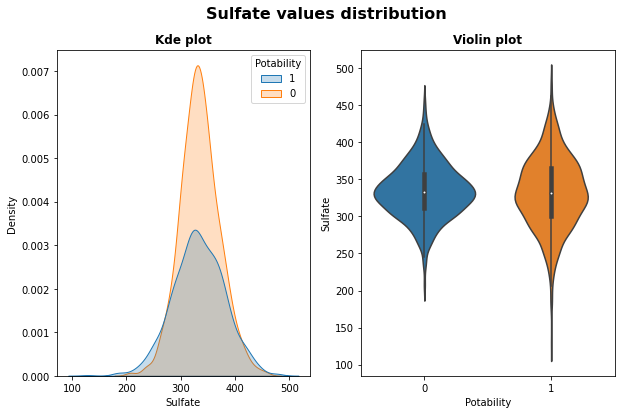

In [10]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (10,6))
sns.kdeplot(x = 'Sulfate', hue = 'Potability', fill = True, data = water_df, hue_order=[1,0], ax = axis1)
sns.violinplot(x = 'Potability', y = 'Sulfate', data = water_df, ax = axis2)

axis1.set_title('Kde plot', size = 12, weight = 'bold')
axis2.set_title('Violin plot', size = 12, weight = 'bold')
fig.suptitle('Sulfate values distribution', size = 16, weight = 'bold');

From the plots we can say the sulphate has some effect onn potability, so we will keep it and impute the values

In [11]:
# Impute Missing Values with Label Matching Mean
for col in ['Sulfate','ph','Trihalomethanes']:
    missing_label_0 = water_df.query('Potability == 0')[col][water_df[col].isna()].index
    water_df.loc[missing_label_0,col] = water_df.query('Potability == 0')[col][water_df[col].notna()].mean()

    missing_label_1 = water_df.query('Potability == 1')[col][water_df[col].isna()].index
    water_df.loc[missing_label_1,col] = water_df.query('Potability == 1')[col][water_df[col].notna()].mean()

## **Exploratory Data Analysis**

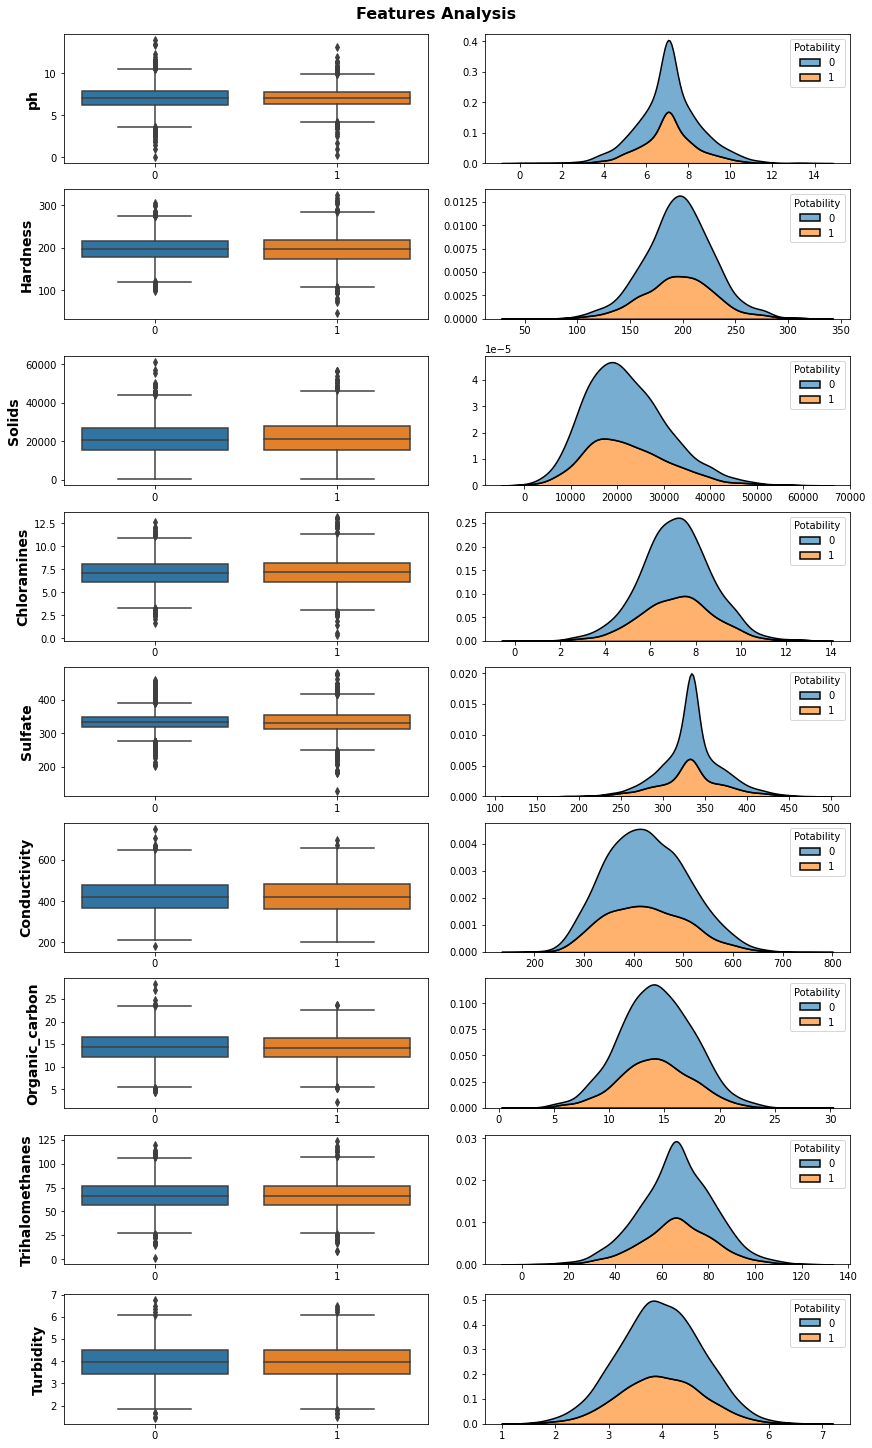

In [12]:
fig, ax = plt.subplots(9, 2, figsize=(12,20), constrained_layout = True)
numeric_col = water_df.select_dtypes(float).columns.to_list()
for i, col in enumerate(numeric_col):
    sns.boxplot(x = 'Potability', y = col, data = water_df, ax = ax[i][0])
    
    sns.kdeplot(x = col, hue = 'Potability', fill = True, multiple = 'stack',
                alpha = 0.6, linewidth = 1.5, data = water_df, ax = ax[i][1])
    ax[i][0].set_xlabel(None)
    ax[i][0].set_ylabel(col, size = 14, weight = 'bold')
    ax[i][1].set_xlabel(None)
    ax[i][1].set_ylabel(None)
    
fig.suptitle('Features Analysis', size = 16, weight = 'bold');

There are many outliers in the data which needs to be removed

<Figure size 432x288 with 0 Axes>

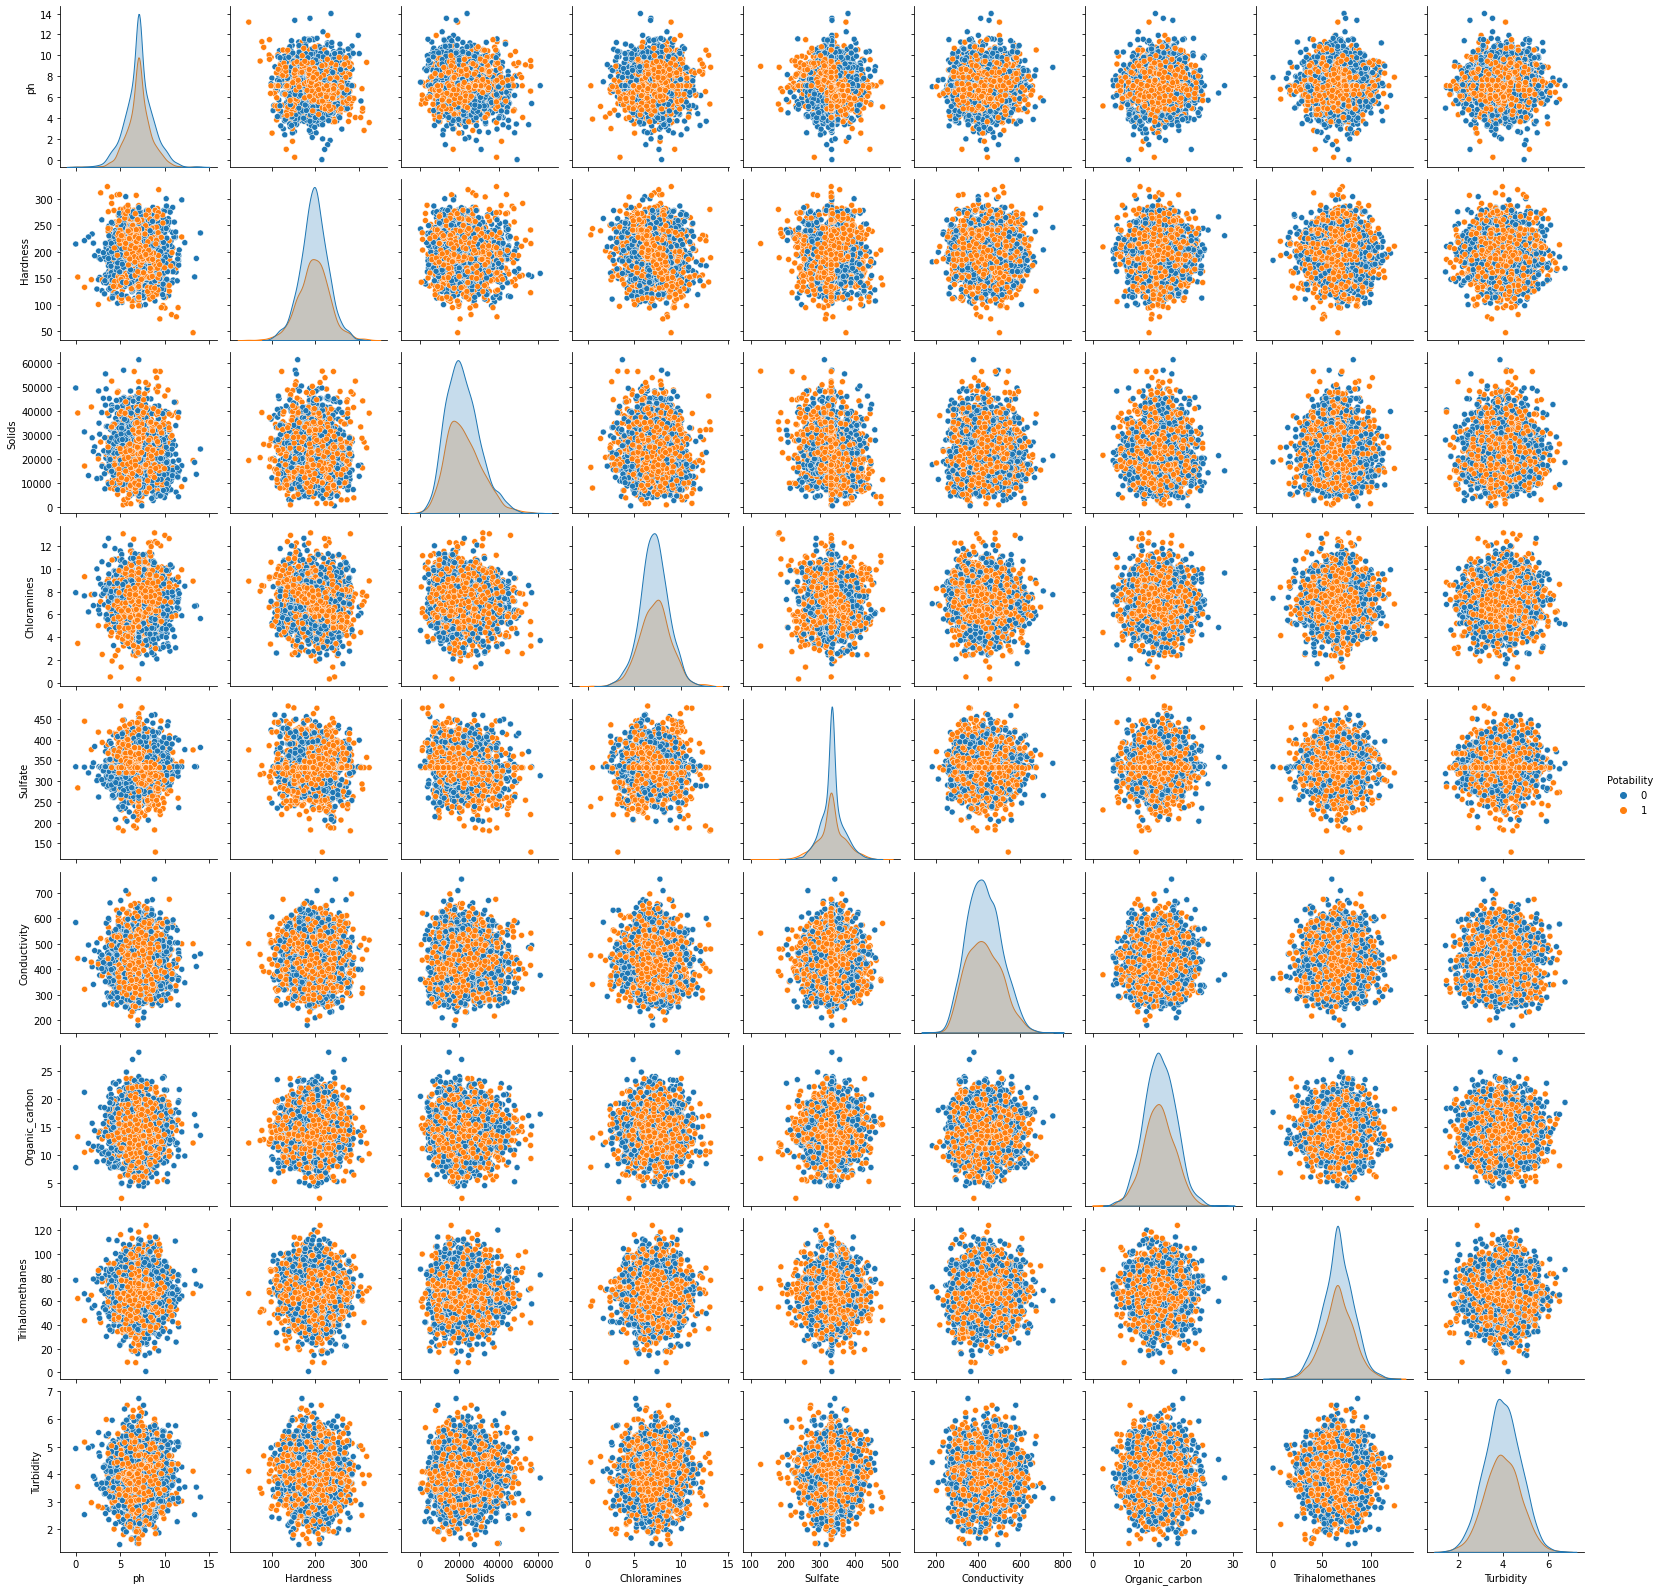

In [13]:
fig = plt.figure()
sns.pairplot(water_df, hue = 'Potability')

It does'nt seem to be any linear relationship between the features as the plots are kind of circle. We can say that their is no multicollinearity but to be 100% sure, let's find out the correlation between them.



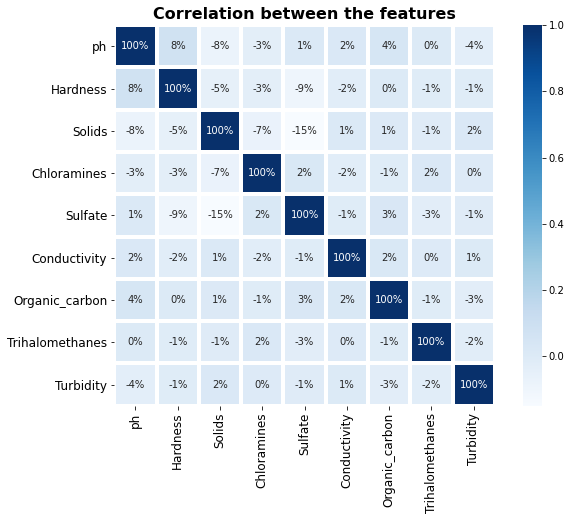

In [14]:
# Correlation between numeric variables
fig=plt.figure(figsize=(10,7))
axis=sns.heatmap(water_df[numeric_col].corr(), annot=True, linewidths=3, square=True, cmap='Blues', fmt=".0%")

axis.set_title('Correlation between the features', fontsize=16, weight='bold', y=1.05);
axis.set_xticklabels(numeric_col, fontsize=12)
axis.set_yticklabels(numeric_col, fontsize=12, rotation=0);

The features doesn't seems to have any multicolinearity 

In [15]:
# Using 'setup' from pycaret.classification for preprocessing the data
clf = setup(water_df, target = 'Potability',
            remove_outliers = True, outliers_threshold = 0.05, # Removing outliers with threshold of 5 percentile
            numeric_imputation = 'mean', # Imputing missing values with mean
            normalize = True, # Normalizing the features, so that Gradient Descent will converge fast
            normalize_method = 'zscore', # Mean => 0 and std. deviation => 1
            train_size = 0.8,
            fold = 10, # Number of K-folds
            use_gpu = True)

,Description,Value
0,session_id,4630
1,Target,Potability
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(3276, 10)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7839,0.8726,0.6528,0.7575,0.6998,0.5325,0.5373,0.178
gbc,Gradient Boosting Classifier,0.7790,0.8655,0.5623,0.8098,0.6619,0.5060,0.5257,0.757
rf,Random Forest Classifier,0.7770,0.8601,0.5862,0.7854,0.6680,0.5063,0.5205,1.379
dt,Decision Tree Classifier,0.7284,0.7113,0.6362,0.6553,0.6445,0.4250,0.4261,0.033
ada,Ada Boost Classifier,0.7264,0.8091,0.5052,0.7082,0.5834,0.3902,0.4055,0.270
et,Extra Trees Classifier,0.6766,0.7359,0.3222,0.6691,0.4333,0.2451,0.2774,1.350
qda,Quadratic Discriminant Analysis,0.6633,0.6692,0.3254,0.6252,0.4267,0.2211,0.2452,0.025
knn,K Neighbors Classifier,0.6239,0.6199,0.3919,0.5185,0.4457,0.1696,0.1737,0.209
lr,Logistic Regression,0.6135,0.5020,0.0000,0.0000,0.0000,0.0000,0.0000,0.028
ridge,Ridge Classifier,0.6135,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.018
